<a href="https://colab.research.google.com/github/nilaynishant/AIMLTutorial/blob/main/01_geospatial_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and data download


In [ ]:
!pip install --quiet rioxarray

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
    !pip install --quiet rioxarray

In [ ]:
import os
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import matplotlib.pyplot as plt

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
filename = 'N28E087.hgt'
file_path = os.path.join(data_folder, filename)
rds = rxr.open_rasterio(file_path)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

srtm_tiles = [
  'N27E086.hgt',
  'N27E087.hgt',
  'N28E086.hgt',
  'N28E087.hgt'
]

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/srtm/'

for tile in srtm_tiles:
  url = '{}/{}'.format(data_url, tile)
  download(url)

Downloaded data/N27E086.hgt
Downloaded data/N27E087.hgt
Downloaded data/N28E086.hgt
Downloaded data/N28E087.hgt


In [ ]:
datasets = []
for tile in srtm_tiles:
    path = os.path.join(data_folder, tile)
    rds = rxr.open_rasterio(path)
    band = rds.sel(band=1)
    datasets.append(band)

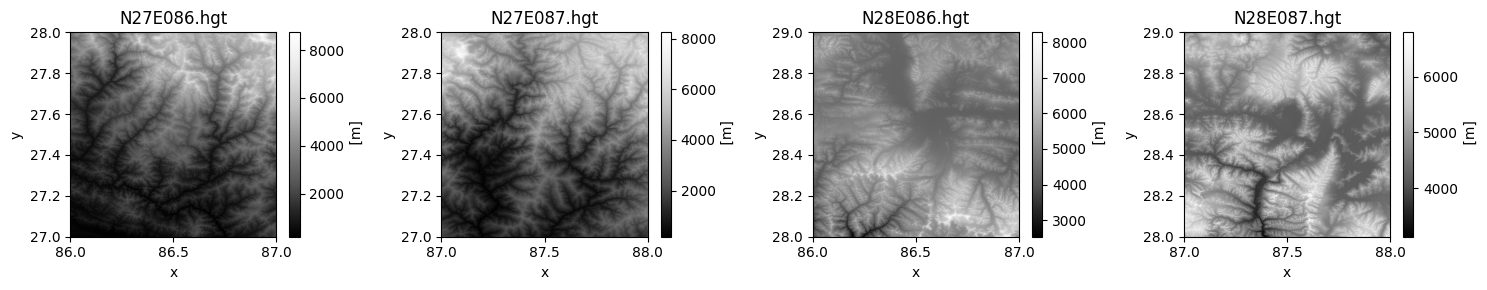

In [ ]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,3)
for index, ax in enumerate(axes.flat):
    da = datasets[index]
    im = da.plot.imshow(ax=ax, cmap='Greys_r')
    filename = srtm_tiles[index]
    ax.set_title(filename)

plt.tight_layout()
plt.show()

In [ ]:
merged = merge_arrays(datasets, method='first')
merged

<xarray.DataArray (y: 7201, x: 7201)>
array([[4916, 4926, 4931, ..., 5097, 5098, 5089],
       [4919, 4932, 4928, ..., 5080, 5075, 5069],
       [4919, 4928, 4935, ..., 5063, 5055, 5048],
       ...,
       [ 368,  368,  366, ..., 1905, 1919, 1937],
       [ 364,  364,  362, ..., 1913, 1930, 1944],
       [ 360,  359,  357, ..., 1918, 1930, 1942]], dtype=int16)
Coordinates:
  * x            (x) float64 86.0 86.0 86.0 86.0 86.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29.0 29.0 29.0 29.0 29.0 ... 27.0 27.0 27.0 27.0
    band         int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

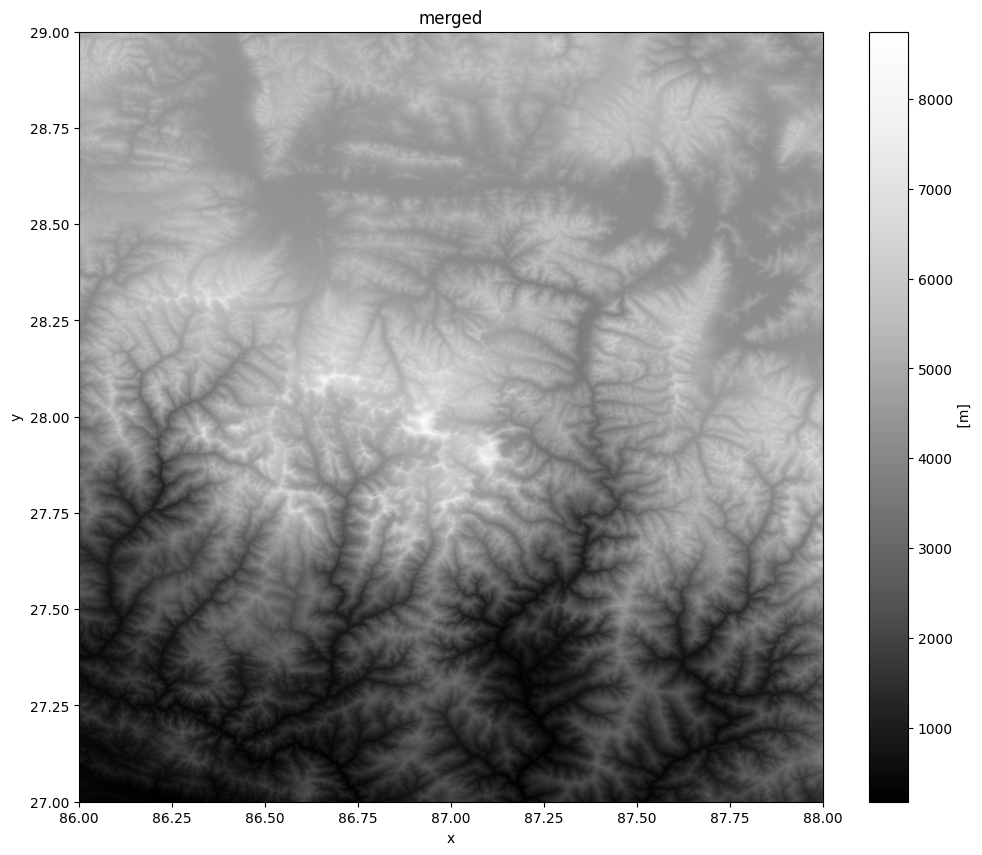

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
merged.plot.imshow(ax=ax, cmap='Greys_r')
ax.set_title('merged')
plt.show()

In [1]:
# Install libraries
%%capture
if 'google.colab' in str(get_ipython()):
  !apt install libspatialindex-dev
  !pip install fiona shapely pyproj rtree mapclassify
  !pip install geopandas
  !pip install leafmap
  !pip install localtileserver

In [ ]:
# Load libraries
import os
import geopandas as gpd
import leafmap.foliumap as leafmap

In [ ]:
landsat = 'landsat.tif'
sentinel = 'Data/Sentinel2_Agartala.tif'

In [ ]:
# Data download
landsat_url = (
    'https://drive.google.com/file/d/1EV38RjNxdwEozjc9m0FcO3LFgAoAX1Uw/view?usp=sharing'
)
leafmap.download_file(landsat_url, 'landsat.tif', unzip=False)

Downloading...
From: https://drive.google.com/uc?id=1EV38RjNxdwEozjc9m0FcO3LFgAoAX1Uw
To: /content/landsat.tif
100%|██████████| 10.4M/10.4M [00:00<00:00, 178MB/s]


'/content/landsat.tif'

In [ ]:
m = leafmap.Map(width=800, height=500)

In [ ]:
m.add_raster(landsat, layer_name='Landsat')

In [ ]:
m

In [ ]:
# Data download
landsat_url = (
    'https://github.com/waleedgeo/lulc_py/blob/main/materials/rasters/s2image.tif'
)
leafmap.download_file(landsat_url, 'sentinel.tif', unzip=False)


Downloading...
From: https://raw.githubusercontent.com/waleedgeo/lulc_py/main/materials/rasters/s2image.tif
To: /content/sentinel.tif
100%|██████████| 3.79M/3.79M [00:00<00:00, 52.8MB/s]


'/content/sentinel.tif'

In [ ]:
m.add_raster(sentinel,  layer_name='Sentinel')

ImportError: localtileserver is not installed. Please install it before proceeding. https://github.com/banesullivan/localtileserver

In [ ]:
from localtileserver import get_leaflet_tile_layer, TileClient
from ipyleaflet import Map

# First, create a tile server from local raster file
client = TileClient('path/to/geo.tif')

# Create ipyleaflet tile layer from that server
t = get_leaflet_tile_layer(client)

m = Map(center=client.center(), zoom=client.default_zoom)
m.add_layer(t)
m